In [13]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


# Użycie "twarzy własnych" (eigenfaces)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat('allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'][0,0])
n = int(mat_contents['n'][0,0])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

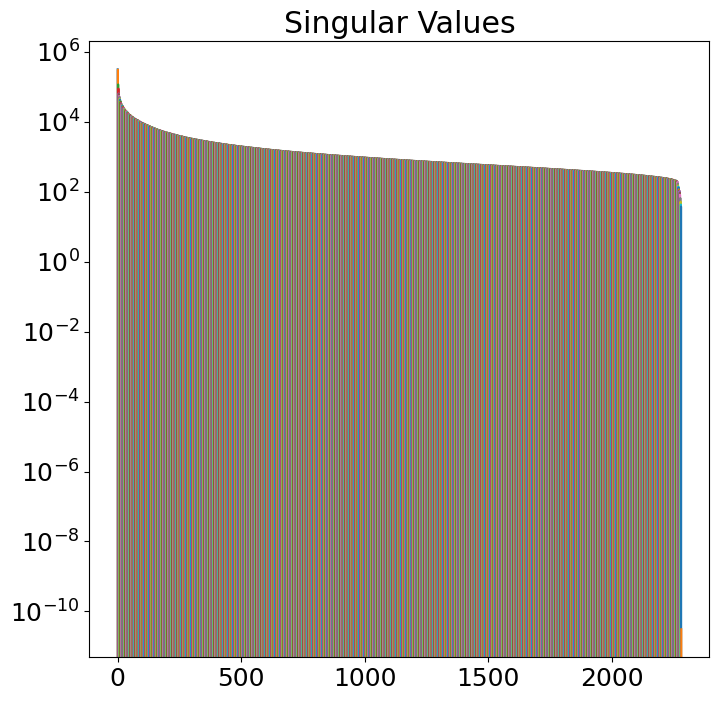

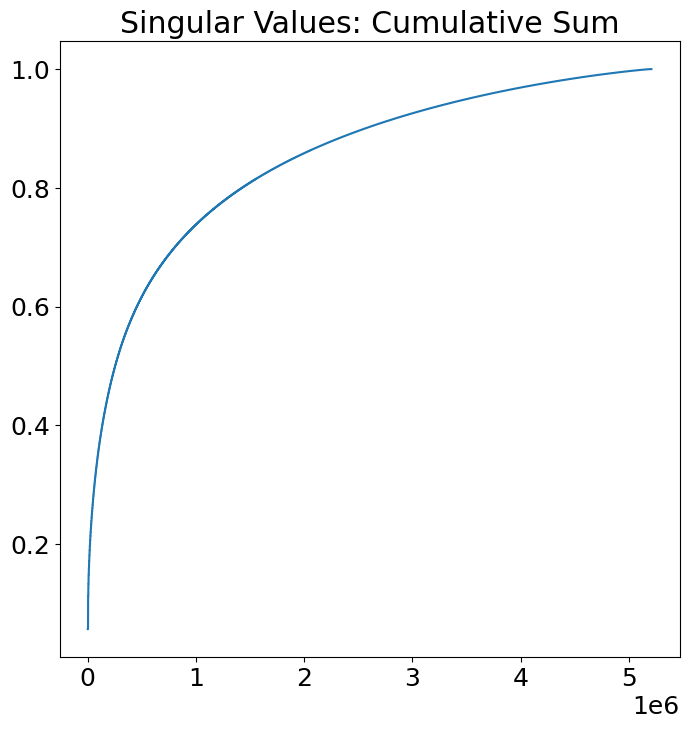

In [15]:
# Plot singular values

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

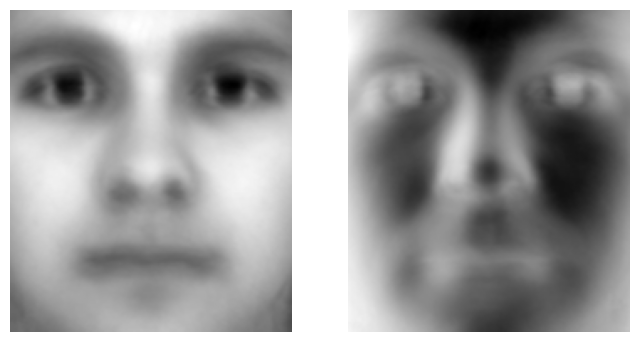

In [16]:
# two more faces

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

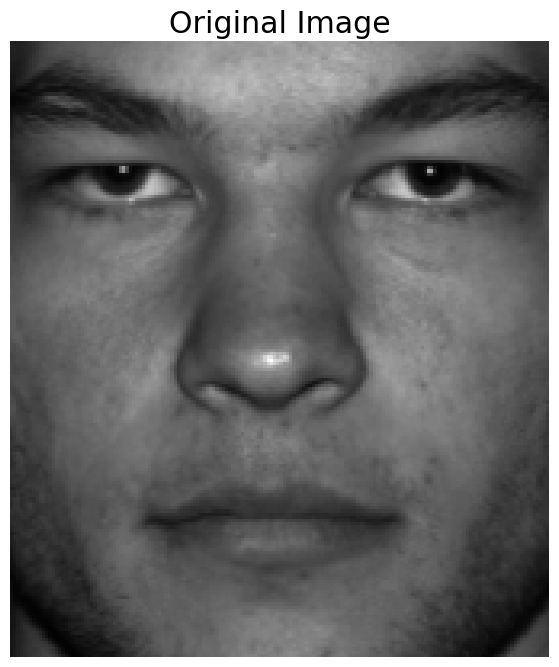

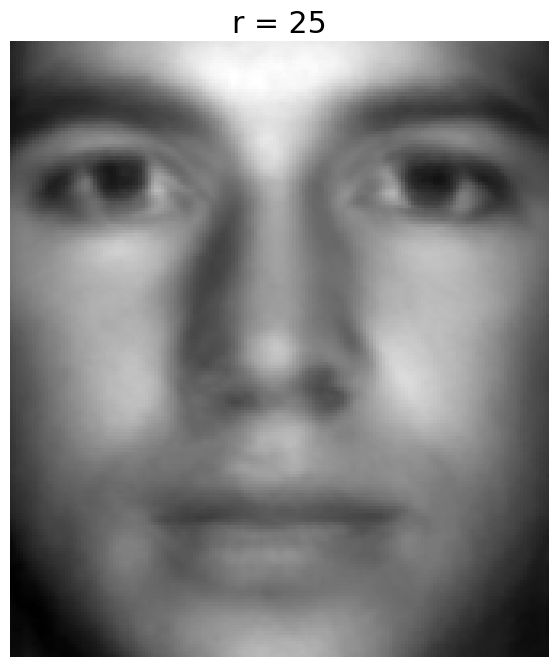

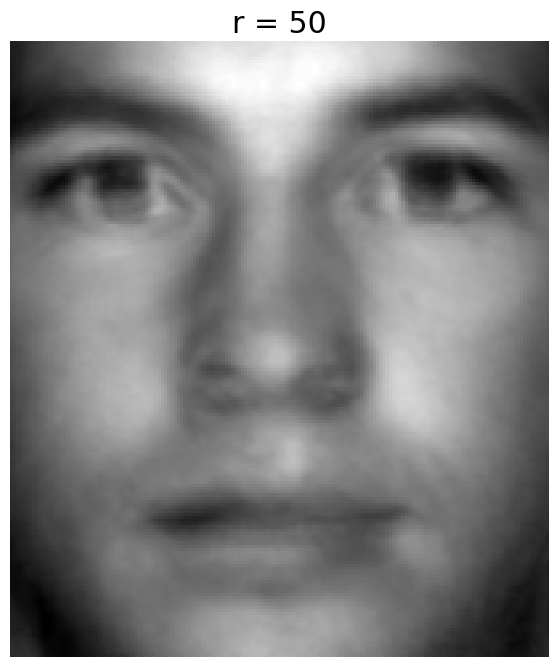

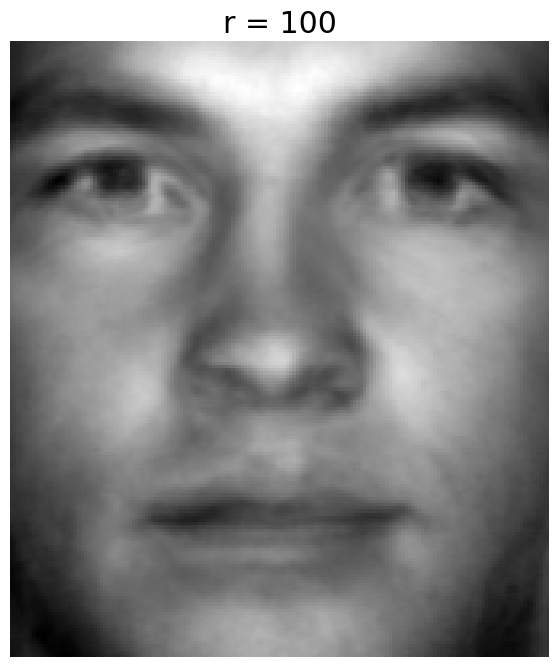

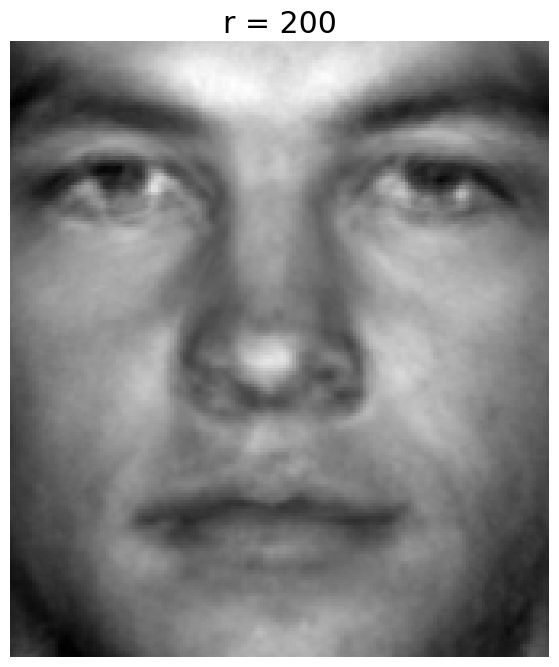

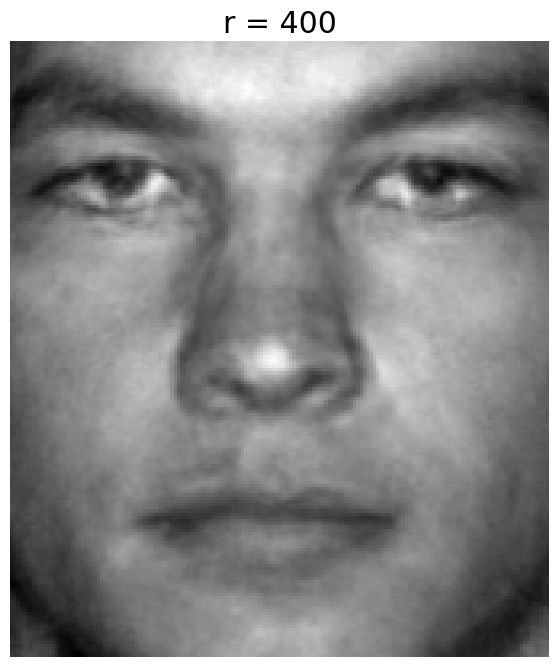

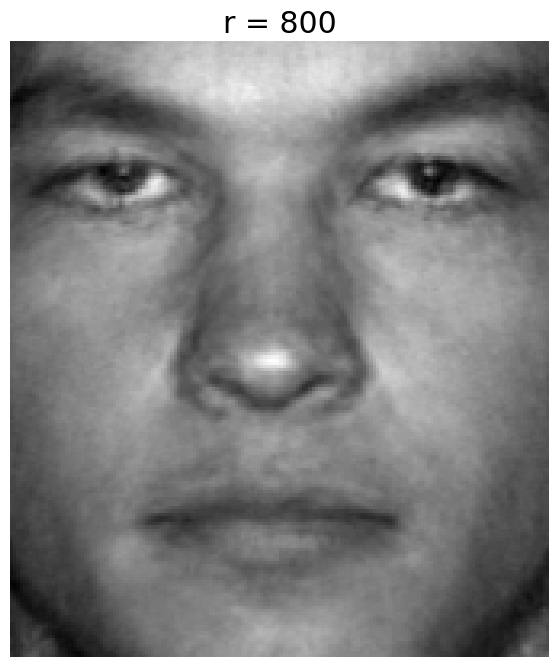

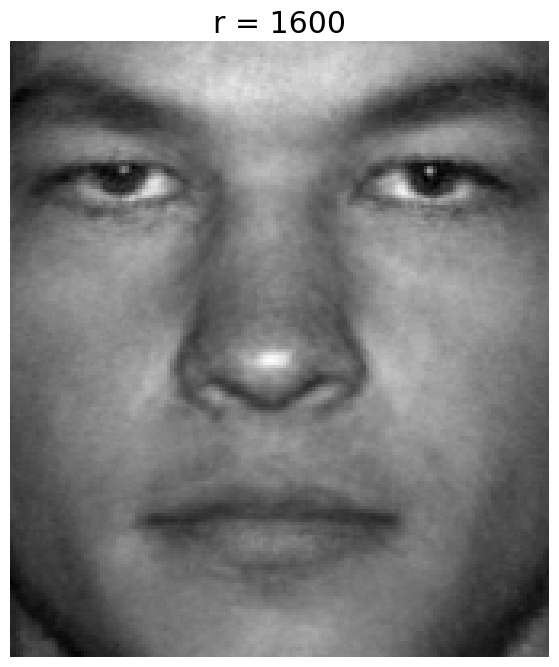

In [17]:
## Now show eigenface reconstruction of image that was omitted from test set

testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

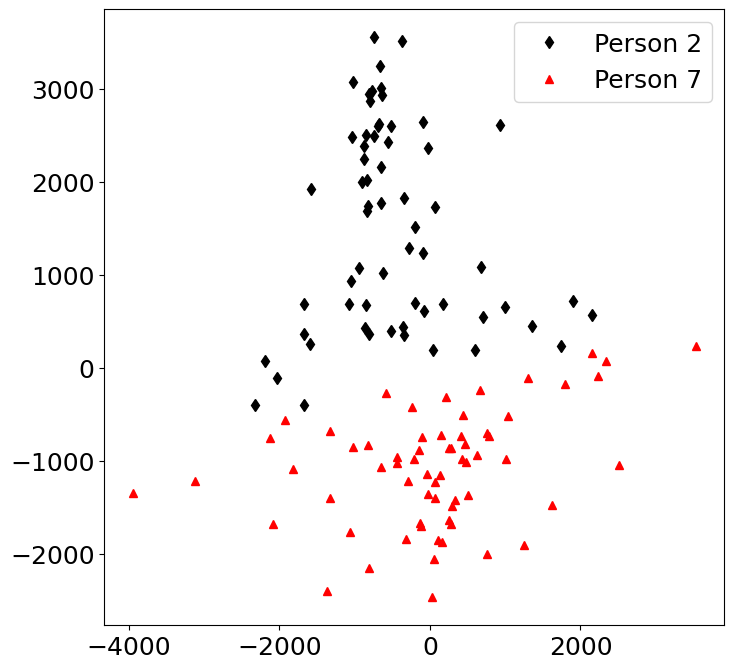

In [18]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')

plt.legend()
plt.show()

In [19]:
## Zadanie: ile eigenfaces dla k=15% informacji?

In [20]:
# obliczam skumulowana wariancje
k = 15  # procent informacji do zachowania

variance = S**2
cumulative_variance = np.cumsum(variance) / np.sum(variance)

# szukam r gdzie mam wiecej niz k%
r_needed = np.argmax(cumulative_variance > k/100) + 1

print(f"k = {k}%")
print(f"Potrzebne r = {r_needed}")
print(f"Zachowana informacja: {cumulative_variance[r_needed-1]*100:.2f}%")

k = 15%
Potrzebne r = 1
Zachowana informacja: 36.34%


### Rekonstrukcja twarzy testowej z r eigenfaces

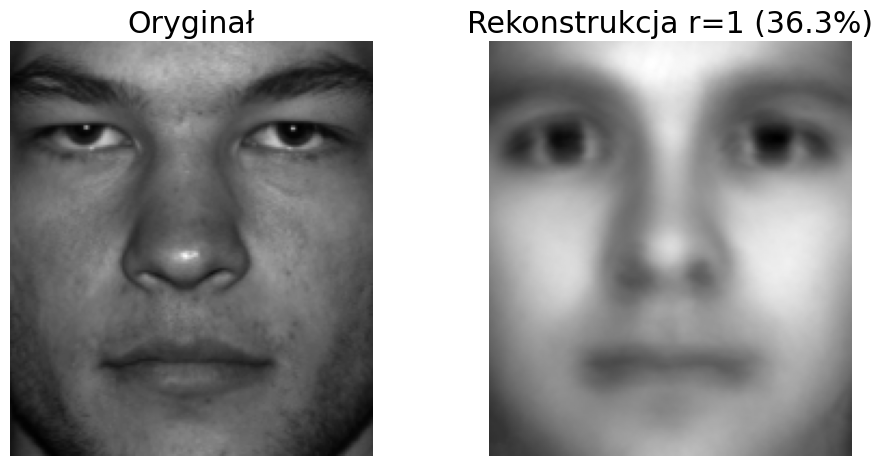

In [21]:
# biorę twarz testową (osoba 37)
testFace = faces[:,np.sum(nfaces[:36])]
testFaceMS = testFace - avgFace

# rekonstrukcja z r eigenfaces
reconFace = avgFace + U[:,:r_needed] @ U[:,:r_needed].T @ testFaceMS

# wyswietlam oryginał i rekonstrukcje
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
axes[0].set_title('Oryginał')
axes[0].axis('off')

axes[1].imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
axes[1].set_title(f'Rekonstrukcja r={r_needed} ({cumulative_variance[r_needed-1]*100:.1f}%)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Pierwsze eigenfaces użyte do rekonstrukcji

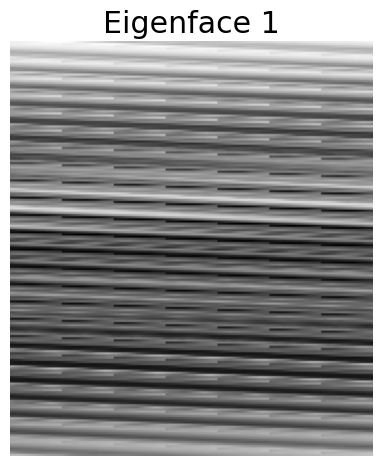

In [22]:
# pokażę pierwsze r eigenfaces
if r_needed == 1:
    # dla pojedynczego eigenface
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    eigenface = U[:, 0].reshape(n, m)
    ax.imshow(eigenface, cmap='gray')
    ax.set_title(f'Eigenface 1')
    ax.axis('off')
else:
    # dla wielu eigenfaces
    fig, axes = plt.subplots(2, min(5, r_needed), figsize=(12, 5))
    if r_needed < 5:
        axes = axes.reshape(2, -1)
    
    for i in range(min(10, r_needed)):
        row = i // 5
        col = i % 5
        eigenface = U[:, i].reshape(n, m)
        axes[row, col].imshow(eigenface, cmap='gray')
        axes[row, col].set_title(f'Eigenface {i+1}')
        axes[row, col].axis('off')
    
    # ukryj puste subploty
    for i in range(r_needed, min(10, axes.size)):
        row = i // 5
        col = i % 5
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()